In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def calc_acc(file_path):
    
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])

    v_arr = np.zeros(len(data))
    t_arr = np.zeros(len(data)-1)
    a_arr = np.zeros(len(data)-2)
    for i in range(1,len(data)-1):
        data = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                       names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])
    
        x_smooth = np.array(data['x_smooth'])
        y_smooth = np.array(data['y_smooth'])
        z_smooth = np.array(data['z_smooth'])
        time = np.array(data['time'])
    
        t_next = time[i+1]
        x_next = x_smooth[i+1]
        y_next = y_smooth[i+1]
        z_next = z_smooth[i+1]
    
        t_prev = time[i-1]
        x_prev = x_smooth[i-1]
        y_prev = y_smooth[i-1]
        z_prev = z_smooth[i-1]
        r_diff = np.sqrt((x_next-x_prev)**2+(y_next-y_prev)**2+(z_next-z_prev)**2)
        dt = t_next - t_prev
  
  
    #velocity at the current point using central difference
        
    
        v_arr[i] = r_diff / dt
    
    t_arr = time[1:-1]
    v_arr = v_arr[1:-1]

        
    for i in range(1, len(v_arr) - 1):
        dv = (v_arr[i + 1] - v_arr[i - 1])
        dt = time[i + 1] - time[i - 1]
        a_arr[i] = dv / dt
    t_for_acc = time [2:-2] 
    a_arr = a_arr[1:-1]   
    return a_arr , t_for_acc
    

    



In [67]:
a_arr, t_for_acc = calc_acc(file_path = 'FINALDATA/WT_planktonic_final/track102_0_processed.txt')

In [68]:
print(len(t_for_acc))

534


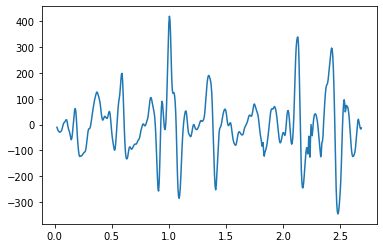

In [69]:
plt.plot(t_for_acc , a_arr)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

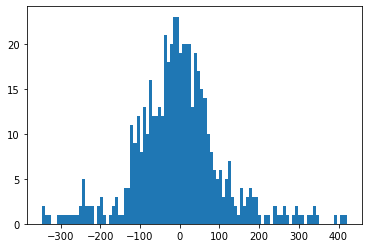

In [70]:
plt.hist(a_arr,  bins = 100)
plt.show

In [64]:
a_arr_s, t_for_acc_s = calc_acc(file_path = 'FINALDATA/WT_planktonic_final/track34259_0_processed.txt')

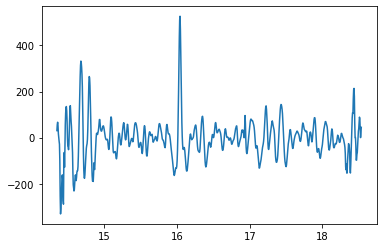

In [65]:
plt.plot(t_for_acc_s , a_arr_s)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

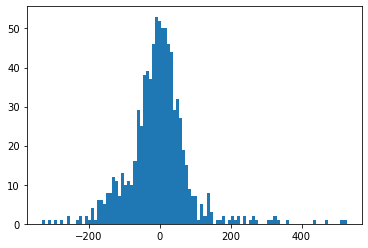

In [66]:
plt.hist(a_arr_s,  bins = 100)
plt.show